In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onlineretail/OnlineRetail.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 1. Lendo o dataset

In [5]:
df = pd.read_csv('/kaggle/input/onlineretail/OnlineRetail.csv', 
                 encoding='unicode_escape', 
                 parse_dates=['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Tratamento dos dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#cuidando dos dados
df['CustomerID'] = df['CustomerID'].astype(object)
df['Dates'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [8]:
#Transformando a coluna Dates como datetime. 
df['Dates'] = pd.to_datetime(df['Dates'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
 8   Dates        541909 non-null  datetime64[ns]
 9   Time         541909 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 41.3+ MB


In [9]:
#Deletando a coluna InvoiceDate para não ter informações demais no dataset
df.drop(columns=['InvoiceDate'], inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [10]:
#Dropando as linhas com usuarios vazios
df.dropna(subset=['CustomerID'], inplace=True)

In [11]:
#checando se ainda há valores nulos no dataset
df.CustomerID.isna().sum()

0

In [12]:
#Verificando a quantidade de linhas e colunas
df.shape

(406829, 9)

In [13]:
#checando quantos valores unicos de SKUs
df.StockCode.nunique()

3684

In [14]:
#Checando valores unicos de usuarios
df.CustomerID.nunique()

4372

In [15]:
#Verificando quantos paises o ecommerce entrega os pedidos
df.Country.nunique()

37

In [16]:
#listando os paises que entregam os pedidos.
df.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [17]:
#Checando das datas minima e maxima
df['Dates'].min(), df['Dates'].max()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2011-12-09 00:00:00'))

In [18]:
#Fazendo a analise descritiva dos dados
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [19]:
#checando as quantidades negativas
df[df['Quantity'] <1]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
141,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,2010-12-01,09:41:00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,2010-12-01,09:49:00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,2010-12-01,10:24:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,14397.0,United Kingdom,2011-12-09,09:57:00
541541,C581499,M,Manual,-1,224.69,15498.0,United Kingdom,2011-12-09,10:28:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311.0,United Kingdom,2011-12-09,11:57:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,17315.0,United Kingdom,2011-12-09,11:58:00


## univariate analysis

In [20]:
#verificando a quantidade negativa que apareceu na analise decritiva.
#Aparentemente são compras canceladas.
df[df['Description'] == 'PAPER CRAFT , LITTLE BIRDIE']

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,United Kingdom,2011-12-09,09:15:00
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2.08,16446.0,United Kingdom,2011-12-09,09:27:00


In [21]:
#Este consumidor cancelou todos as compras realizadas
df.query("CustomerID == 17548.0")

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,2010-12-01,10:24:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,3.45,17548.0,United Kingdom,2010-12-01,10:24:00
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,1.65,17548.0,United Kingdom,2010-12-01,10:24:00
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,1.65,17548.0,United Kingdom,2010-12-01,10:24:00
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,1.25,17548.0,United Kingdom,2011-04-20,12:01:00
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,1.65,17548.0,United Kingdom,2011-04-20,12:01:00
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,1.65,17548.0,United Kingdom,2011-04-20,12:01:00


In [22]:
#Supondo que o C em InvoiceNo é de Canceled, não há como o consumidor adquirir 12 unidades em setembro e cancelar 1 unidade em dezembro...
#Mas supondo ser um ecommerce chines, é capaz do lag time ser mais de 2 meses..
df.query("CustomerID == 17315.0 & Description == 'HANGING HEART JAR T-LIGHT HOLDER'")

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
34542,539404,84978,HANGING HEART JAR T-LIGHT HOLDER,6,1.25,17315.0,United Kingdom,2010-12-17,12:24:00
97437,544633,84978,HANGING HEART JAR T-LIGHT HOLDER,72,1.06,17315.0,United Kingdom,2011-02-22,10:59:00
137259,548150,84978,HANGING HEART JAR T-LIGHT HOLDER,36,1.06,17315.0,United Kingdom,2011-03-29,12:55:00
165787,550828,84978,HANGING HEART JAR T-LIGHT HOLDER,6,1.25,17315.0,United Kingdom,2011-04-21,10:19:00
182323,552537,84978,HANGING HEART JAR T-LIGHT HOLDER,36,1.06,17315.0,United Kingdom,2011-05-10,10:11:00
340334,566624,84978,HANGING HEART JAR T-LIGHT HOLDER,12,1.25,17315.0,United Kingdom,2011-09-14,09:36:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,17315.0,United Kingdom,2011-12-09,11:58:00


Esse é o produto

![HANGING HEART JAR T-LIGHT HOLDER](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS9v5ex300rqMjgxf3PWL9-3EgwwnCIoYWYi04NU_2wiWJeAaippcTcEDZpW_MRU9S-juw&usqp=CAU)

In [23]:
#Nas transações verificadas houve cancelamentos e não ha registros de compra antes de dezembro/2010. 
#Vou excluir os cancelamentos registrados em dez/2011

In [24]:
df[(df['Dates'] < '2010-01')]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   UnitPrice    406829 non-null  float64       
 5   CustomerID   406829 non-null  object        
 6   Country      406829 non-null  object        
 7   Dates        406829 non-null  datetime64[ns]
 8   Time         406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 31.0+ MB


In [26]:
datas_menores = df[(df['Dates'] < '2011-01') & (df['Quantity'] < 1)]
datas_menores

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
141,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,2010-12-01,09:41:00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,2010-12-01,09:49:00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,2010-12-01,10:24:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00
...,...,...,...,...,...,...,...,...,...
41622,C539950,85099C,JUMBO BAG BAROQUE BLACK WHITE,-1,1.95,13534.0,United Kingdom,2010-12-23,11:50:00
41623,C539950,85099B,JUMBO BAG RED RETROSPOT,-10,1.95,13534.0,United Kingdom,2010-12-23,11:50:00
41624,C539950,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,4.95,13534.0,United Kingdom,2010-12-23,11:50:00
41696,C539956,35004C,SET OF 3 COLOURED FLYING DUCKS,-15,4.65,12980.0,United Kingdom,2010-12-23,12:55:00


In [27]:
#Como nao conseguimos casar compra com cancelamentos antes de dez/2010, entao vou filtrar os dados.

df_filtered = df.drop(datas_menores.index)

df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [28]:
#checando
df_filtered.query("CustomerID == 15311.0 & Description == 'VICTORIAN SEWING BOX LARGE'")

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
9197,537195,21258,VICTORIAN SEWING BOX LARGE,8,10.95,15311.0,United Kingdom,2010-12-05,13:55:00
21364,538076,21258,VICTORIAN SEWING BOX LARGE,8,10.95,15311.0,United Kingdom,2010-12-09,14:15:00
44161,540157,21258,VICTORIAN SEWING BOX LARGE,8,10.95,15311.0,United Kingdom,2011-01-05,11:41:00
420280,572885,21258,VICTORIAN SEWING BOX LARGE,1,12.75,15311.0,United Kingdom,2011-10-26,13:45:00
432260,573865,21258,VICTORIAN SEWING BOX LARGE,8,10.95,15311.0,United Kingdom,2011-11-01,12:00:00
520453,580284,21258,VICTORIAN SEWING BOX LARGE,8,10.95,15311.0,United Kingdom,2011-12-02,13:21:00
530911,C580886,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311.0,United Kingdom,2011-12-06,12:25:00
531140,580904,21258,VICTORIAN SEWING BOX LARGE,8,10.95,15311.0,United Kingdom,2011-12-06,12:59:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311.0,United Kingdom,2011-12-09,11:57:00
541744,581571,21258,VICTORIAN SEWING BOX LARGE,8,10.95,15311.0,United Kingdom,2011-12-09,12:00:00


In [29]:
#checando
df_filtered[df_filtered['Quantity'] <1]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
42557,C540006,21306,SET/4 DAISY MIRROR MAGNETS,-1,2.10,14606.0,United Kingdom,2011-01-04,10:48:00
42558,C540006,84352,SILVER CHRISTMAS TREE BAUBLE STAND,-1,16.95,14606.0,United Kingdom,2011-01-04,10:48:00
42559,C540006,22423,REGENCY CAKESTAND 3 TIER,-1,12.75,14606.0,United Kingdom,2011-01-04,10:48:00
42560,C540007,21055,TOOL BOX SOFT TOY,-6,8.95,15379.0,United Kingdom,2011-01-04,11:08:00
42561,C540007,22274,FELTCRAFT DOLL EMILY,-6,2.95,15379.0,United Kingdom,2011-01-04,11:08:00
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,14397.0,United Kingdom,2011-12-09,09:57:00
541541,C581499,M,Manual,-1,224.69,15498.0,United Kingdom,2011-12-09,10:28:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311.0,United Kingdom,2011-12-09,11:57:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,17315.0,United Kingdom,2011-12-09,11:58:00


In [30]:
#checando
df_filtered.query("CustomerID == 14397.0 & Description == 'ZINC T-LIGHT HOLDER STARS SMALL'")

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
182821,552575,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,0.83,14397.0,United Kingdom,2011-05-10,12:25:00
261711,559883,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,0.83,14397.0,United Kingdom,2011-07-13,11:34:00
276636,561067,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,0.83,14397.0,United Kingdom,2011-07-24,14:26:00
291258,562442,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,0.83,14397.0,United Kingdom,2011-08-04,18:31:00
308454,563982,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,0.83,14397.0,United Kingdom,2011-08-22,11:17:00
328604,565792,23144,ZINC T-LIGHT HOLDER STARS SMALL,24,0.83,14397.0,United Kingdom,2011-09-07,09:37:00
349804,567531,23144,ZINC T-LIGHT HOLDER STARS SMALL,24,0.83,14397.0,United Kingdom,2011-09-21,09:37:00
398181,571225,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,0.83,14397.0,United Kingdom,2011-10-14,13:41:00
424960,573294,23144,ZINC T-LIGHT HOLDER STARS SMALL,36,0.83,14397.0,United Kingdom,2011-10-28,15:32:00
456312,575684,23144,ZINC T-LIGHT HOLDER STARS SMALL,144,0.72,14397.0,United Kingdom,2011-11-10,15:57:00


In [31]:
#era so fazer o diferente ali no query!
description_manual = df_filtered.query('Description == "Manual"')
description_manual

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
2239,536569,M,Manual,1,1.25,16274.0,United Kingdom,2010-12-01,15:35:00
2250,536569,M,Manual,1,18.95,16274.0,United Kingdom,2010-12-01,15:35:00
6798,536981,M,Manual,2,0.85,14723.0,United Kingdom,2010-12-03,14:26:00
7976,537077,M,Manual,12,0.42,17062.0,United Kingdom,2010-12-05,11:59:00
8530,537137,M,Manual,36,0.85,16327.0,United Kingdom,2010-12-05,12:43:00
...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,1.25,17841.0,United Kingdom,2011-12-06,14:23:00
533082,C581009,M,Manual,-1,125.00,16971.0,United Kingdom,2011-12-07,09:15:00
534308,C581145,M,Manual,-1,9.95,17490.0,United Kingdom,2011-12-07,13:48:00
538321,581405,M,Manual,3,0.42,13521.0,United Kingdom,2011-12-08,13:50:00


In [32]:
#Removendo as linhas "Manual"
df_sem_manual = df_filtered.drop(description_manual.index)
df_sem_manual.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [33]:
#Tirei 1153 linhas com 'Manual'
df.shape[0] - df_sem_manual.shape[0]

1153

In [34]:
#checando
df_sem_manual.query("Description == 'Manual'")


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time


In [35]:
# df_sem_manual.query('CustomerID == 17490.0').tail(60)

In [36]:
#checando
df_sem_manual[df_sem_manual['CustomerID'] == 17490.0]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
228815,556958,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,17490.0,United Kingdom,2011-06-16,09:15:00
228816,556958,71459,HANGING JAM JAR T-LIGHT HOLDER,12,0.85,17490.0,United Kingdom,2011-06-16,09:15:00
228817,556958,21937,STRAWBERRY PICNIC BAG,5,2.95,17490.0,United Kingdom,2011-06-16,09:15:00
228818,556958,22558,CLOTHES PEGS RETROSPOT PACK 24,12,1.65,17490.0,United Kingdom,2011-06-16,09:15:00
228819,556958,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,6,2.95,17490.0,United Kingdom,2011-06-16,09:15:00
...,...,...,...,...,...,...,...,...,...
540416,581482,22371,AIRLINE BAG VINTAGE TOKYO 78,12,3.95,17490.0,United Kingdom,2011-12-09,09:08:00
540417,581482,21875,KINGS CHOICE MUG,36,1.06,17490.0,United Kingdom,2011-12-09,09:08:00
540418,581482,23251,VINTAGE RED ENAMEL TRIM MUG,96,1.04,17490.0,United Kingdom,2011-12-09,09:08:00
540419,581482,23300,GARDENERS KNEELING PAD CUP OF TEA,48,1.45,17490.0,United Kingdom,2011-12-09,09:08:00


In [37]:
#checando
df_sem_manual[(df_sem_manual['InvoiceNo']== 'C581145')] # & df_sem_manual['CustomerID'] == 17490.0

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
534309,C581145,35970,ZINC FOLKART SLEIGH BELLS,-12,1.69,17490.0,United Kingdom,2011-12-07,13:48:00
534310,C581145,23249,VINTAGE RED ENAMEL TRIM PLATE,-9,1.49,17490.0,United Kingdom,2011-12-07,13:48:00
534311,C581145,23250,VINTAGE RED TRIM ENAMEL BOWL,-38,1.04,17490.0,United Kingdom,2011-12-07,13:48:00


cliente/stockcode/pais volta os pedidos subtraindo os valores negativos.

## testando as orientações do Bot

In [38]:
df_sem_manual.query("Quantity <1")

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
42557,C540006,21306,SET/4 DAISY MIRROR MAGNETS,-1,2.10,14606.0,United Kingdom,2011-01-04,10:48:00
42558,C540006,84352,SILVER CHRISTMAS TREE BAUBLE STAND,-1,16.95,14606.0,United Kingdom,2011-01-04,10:48:00
42559,C540006,22423,REGENCY CAKESTAND 3 TIER,-1,12.75,14606.0,United Kingdom,2011-01-04,10:48:00
42560,C540007,21055,TOOL BOX SOFT TOY,-6,8.95,15379.0,United Kingdom,2011-01-04,11:08:00
42561,C540007,22274,FELTCRAFT DOLL EMILY,-6,2.95,15379.0,United Kingdom,2011-01-04,11:08:00
...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,1.95,14397.0,United Kingdom,2011-12-09,09:57:00
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,14397.0,United Kingdom,2011-12-09,09:57:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311.0,United Kingdom,2011-12-09,11:57:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,17315.0,United Kingdom,2011-12-09,11:58:00


In [39]:
#Isolando as transações historicas do cliente 14606.0

customer_14606 = df_sem_manual.query("CustomerID == 14606.0")
customer_14606.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
2421,536591,21427,SKULLS STORAGE BOX SMALL,1,2.10,14606.0,United Kingdom,2010-12-01,16:57:00
2422,536591,22135,LADLE LOVE HEART PINK,1,0.42,14606.0,United Kingdom,2010-12-01,16:57:00
2423,536591,90214M,"LETTER ""M"" BLING KEY RING",1,1.25,14606.0,United Kingdom,2010-12-01,16:57:00
2424,536591,90214V,"LETTER ""V"" BLING KEY RING",1,1.25,14606.0,United Kingdom,2010-12-01,16:57:00
2425,536591,90214S,"LETTER ""S"" BLING KEY RING",1,1.25,14606.0,United Kingdom,2010-12-01,16:57:00


In [40]:
#agrupando por InvoiceNo
customer_grouped = (customer_14606.groupby(["Description", 'InvoiceNo','Dates',])
                    .agg(Quantity=('Quantity', 'sum'),
                         UnitPrice=('UnitPrice', 'mean')).reset_index().sort_values(by='Dates')
                   )
customer_grouped.head()

,Description,InvoiceNo,Dates,Quantity,UnitPrice
2625,WALL TIDY RETROSPOT,536591,2010-12-01,1,2.10
1838,RED RETROSPOT CUP,536591,2010-12-01,1,0.85
1845,RED RETROSPOT MINI CASES,536591,2010-12-01,1,7.95
2206,SET/2 RED RETROSPOT TEA TOWELS,536591,2010-12-01,1,2.95
427,CERAMIC CAKE STAND + HANGING CAKES,536591,2010-12-01,1,9.95


In [41]:
# teste = []
# for i in customer_grouped['Description'].unique():
#     df = customer_grouped[customer_grouped['Description']==i]
#     print(df['Quantity']<1)
#     if df[df['Quantity'] < 1]:
#         df['teste'] = df['Quantity'].diff()    
#     df.append(teste)
# teste

In [42]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,12:50:00


In [43]:
df[df['Quantity'] < 1]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
141,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,2010-12-01,09:41:00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,2010-12-01,09:49:00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,2010-12-01,10:24:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,14397.0,United Kingdom,2011-12-09,09:57:00
541541,C581499,M,Manual,-1,224.69,15498.0,United Kingdom,2011-12-09,10:28:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311.0,United Kingdom,2011-12-09,11:57:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,17315.0,United Kingdom,2011-12-09,11:58:00


## drop quantidade negativa e continuação d

In [44]:
# 2% dos dados são as quantidades negativas. Para fim de exercicio, vou dropar os dados com a quantidade negativa.
(len(df_sem_manual[(df_sem_manual['Quantity']< 1)])/df_sem_manual.shape[0]) * 100

1.982370167325649

In [45]:
df_limpo = df_sem_manual[(df_sem_manual['Quantity'] > 1)]
df_limpo

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Dates,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,12:50:00


In [46]:
#Agrupando os dados

df_grouped = (df_limpo
              .groupby(['Dates','Time','CustomerID', 'InvoiceNo','StockCode','Description','Country'])
              .agg(Quantity=('Quantity','sum'),
                   UnitPrice=('UnitPrice', 'mean')).reset_index()
             )
df_grouped.head()

,Dates,Time,CustomerID,InvoiceNo,StockCode,Description,Country,Quantity,UnitPrice
0,2010-12-01,08:26:00,17850.0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,United Kingdom,6,4.25
1,2010-12-01,08:26:00,17850.0,536365,22752,SET 7 BABUSHKA NESTING BOXES,United Kingdom,2,7.65
2,2010-12-01,08:26:00,17850.0,536365,71053,WHITE METAL LANTERN,United Kingdom,6,3.39
3,2010-12-01,08:26:00,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,6,3.39
4,2010-12-01,08:26:00,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,6,3.39


Analisar : 
1. tem algum outro codigo no codigo da transação?
2. Verificar de novo se tem outras anomalias!
3. plotar serie temporal para alguns clientes/ ex. Reino Unido top cinco produtos.
4. Quais top 5 produtos vendidos?
5. Quais são os meses que vendem mais?
6. Qual total de vendas desses produtos
7. Quais produtos são menos vendidos?
8. Qual a evolução das vendas no periodo analisado?
9. Quais dias da semana tem mais vendas?
10. Datas comemorativas tem mais vendas?
11. Quais horarios ha mais vendas?

## Cuidando dos dados

In [47]:
#Criano a coluna 'ValorTotal' com o valor final 
df_grouped['Total'] = df_grouped['Quantity'] * df_grouped['UnitPrice']
df_grouped.head()

,Dates,Time,CustomerID,InvoiceNo,StockCode,Description,Country,Quantity,UnitPrice,Total
0,2010-12-01,08:26:00,17850.0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,United Kingdom,6,4.25,25.50
1,2010-12-01,08:26:00,17850.0,536365,22752,SET 7 BABUSHKA NESTING BOXES,United Kingdom,2,7.65,15.30
2,2010-12-01,08:26:00,17850.0,536365,71053,WHITE METAL LANTERN,United Kingdom,6,3.39,20.34
3,2010-12-01,08:26:00,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,6,3.39,20.34
4,2010-12-01,08:26:00,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,6,3.39,20.34


In [48]:
#Criando as colunas mes, dia e dia da semana
df_grouped['Month'] = df_grouped['Dates'].dt.month
df_grouped['Day'] = df_grouped['Dates'].dt.day
df_grouped['WeekDay'] = df_grouped['Dates'].dt.strftime('%A')
df_grouped.head()

,Dates,Time,CustomerID,InvoiceNo,StockCode,Description,Country,Quantity,UnitPrice,Total,Month,Day,WeekDay
0,2010-12-01,08:26:00,17850.0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,United Kingdom,6,4.25,25.50,12,1,Wednesday
1,2010-12-01,08:26:00,17850.0,536365,22752,SET 7 BABUSHKA NESTING BOXES,United Kingdom,2,7.65,15.30,12,1,Wednesday
2,2010-12-01,08:26:00,17850.0,536365,71053,WHITE METAL LANTERN,United Kingdom,6,3.39,20.34,12,1,Wednesday
3,2010-12-01,08:26:00,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,6,3.39,20.34,12,1,Wednesday
4,2010-12-01,08:26:00,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,6,3.39,20.34,12,1,Wednesday


In [49]:
#Setando a data como indice

df_grouped.set_index('Dates', inplace=True)
df_grouped.head()

,Time,CustomerID,InvoiceNo,StockCode,Description,Country,Quantity,UnitPrice,Total,Month,Day,WeekDay
Dates,,,,,,,,,,,,
2010-12-01,08:26:00,17850.0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,United Kingdom,6,4.25,25.50,12,1,Wednesday
2010-12-01,08:26:00,17850.0,536365,22752,SET 7 BABUSHKA NESTING BOXES,United Kingdom,2,7.65,15.30,12,1,Wednesday
2010-12-01,08:26:00,17850.0,536365,71053,WHITE METAL LANTERN,United Kingdom,6,3.39,20.34,12,1,Wednesday
2010-12-01,08:26:00,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,6,3.39,20.34,12,1,Wednesday
2010-12-01,08:26:00,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,6,3.39,20.34,12,1,Wednesday


## Fazendo a analise dos dados

(array([0.5, 1.5]), [Text(0.5, 0, 'Quantity'), Text(1.5, 0, 'UnitPrice')])

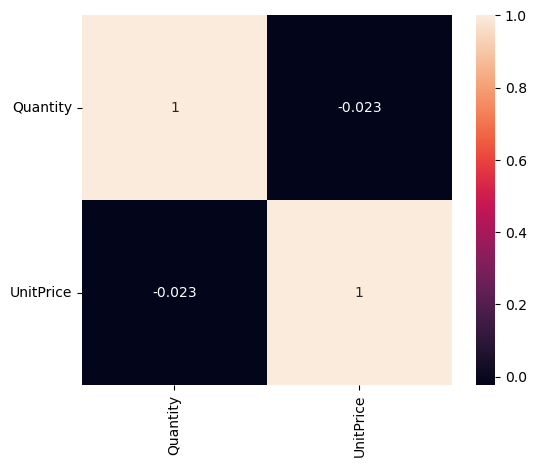

In [50]:
#Plotando heatmap

sns.heatmap(df_grouped[['Quantity', 'UnitPrice']].corr(), square=True, annot=True ); #cmap='bwr'
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Text(0, 0.5, 'Price')

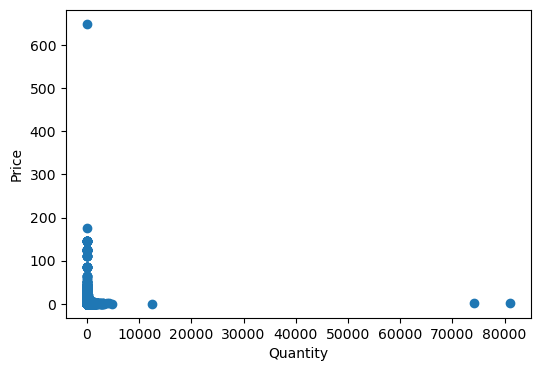

In [51]:
plt.figure(figsize=(6,4))
plt.scatter(df_grouped['Quantity'],df_grouped['UnitPrice']);
plt.xlabel('Quantity')
plt.ylabel('Price')

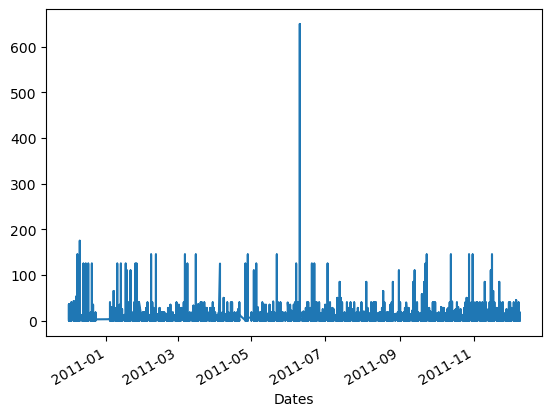

In [52]:
df_grouped['UnitPrice'].plot();

In [53]:
df_grouped[df_grouped['UnitPrice'] > 200.0]

,Time,CustomerID,InvoiceNo,StockCode,Description,Country,Quantity,UnitPrice,Total,Month,Day,WeekDay
Dates,,,,,,,,,,,,
2011-06-10,15:28:00,15098.0,556444,22502,PICNIC BASKET WICKER 60 PIECES,United Kingdom,60,649.5,38970.0,6,10,Friday


![basket](https://www.google.com/imgres?imgurl=https%3A%2F%2Fm.media-amazon.com%2Fimages%2FI%2F81EG2Ok-jnL.jpg&tbnid=BYVCCVrmG_sHkM&vet=12ahUKEwij2pj-_bD-AhU8BbkGHdo7CRwQMygAegUIARCxAQ..i&imgrefurl=https%3A%2F%2Fwww.amazon.com%2FRurality-Wicker-Picnic-Basket-Hamper%2Fdp%2FB00JOL7J6Y&docid=k2YrJ2U1jxBTZM&w=1645&h=1645&q=PICNIC%20BASKET%20WICKER%2060%20PIECES&ved=2ahUKEwij2pj-_bD-AhU8BbkGHdo7CRwQMygAegUIARCxAQ)

In [54]:
df_grouped.Country.value_counts().head()

United Kingdom    279898
Germany             8762
France              7992
EIRE                7017
Spain               2216
Name: Country, dtype: int64

In [55]:
df_grouped.index.max()

Timestamp('2011-12-09 00:00:00')

4. Quais top 5 produtos vendidos?


In [56]:
df_grouped.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index().sort_values(by=['Quantity'], ascending=False).head()

,StockCode,Description,Quantity
2577,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2082,23166,MEDIUM CERAMIC TOP STORAGE JAR,77902
2983,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54414
3390,85099B,JUMBO BAG RED RETROSPOT,46061
3405,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36577


5. Quais são os meses que vendem mais?


In [57]:
qtd_sales_per_day = df_grouped.groupby(['Month', 'Day'])['Quantity'].sum().reset_index().pivot('Month', 'Day', 'Quantity')
qtd_sales_per_day

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,6751.0,18170.0,21343.0,15070.0,NaN,7960.0,9291.0,...,NaN,4946.0,9527.0,14364.0,10308.0,10740.0,9143.0,NaN,3235.0,12228.0
2,14775.0,8700.0,15297.0,11156.0,NaN,1956.0,8365.0,8619.0,6044.0,11729.0,...,20735.0,12020.0,11457.0,9990.0,NaN,4602.0,8221.0,NaN,NaN,NaN
3,11452.0,8482.0,19060.0,12794.0,NaN,4808.0,10870.0,13714.0,11383.0,15119.0,...,13301.0,13781.0,17863.0,13148.0,NaN,4377.0,11346.0,24052.0,19958.0,14869.0
4,18137.0,NaN,5391.0,12616.0,15483.0,7841.0,9744.0,12225.0,NaN,5313.0,...,NaN,NaN,NaN,NaN,14258.0,17477.0,12983.0,NaN,NaN,NaN
5,3721.0,NaN,10988.0,17203.0,16128.0,18088.0,NaN,10285.0,11619.0,16175.0,...,12544.0,17319.0,14418.0,12320.0,16059.0,14736.0,NaN,3925.0,NaN,10465.0
6,9433.0,13593.0,7168.0,NaN,13188.0,8974.0,17422.0,18617.0,27014.0,9757.0,...,15131.0,13766.0,8997.0,NaN,3589.0,8998.0,20854.0,7340.0,20355.0,NaN
7,7279.0,NaN,2958.0,11920.0,17549.0,17590.0,17506.0,10038.0,NaN,3939.0,...,8232.0,NaN,17382.0,14122.0,12574.0,13107.0,29528.0,11096.0,NaN,20445.0
8,11130.0,14137.0,15928.0,39974.0,12007.0,NaN,5128.0,12272.0,15713.0,12266.0,...,15418.0,13493.0,27229.0,13062.0,17310.0,NaN,6405.0,NaN,4146.0,11473.0
9,27552.0,15174.0,NaN,10623.0,22252.0,14343.0,13650.0,15810.0,15790.0,NaN,...,32620.0,19457.0,NaN,19102.0,15030.0,19379.0,23493.0,26768.0,21523.0,NaN


In [58]:
#O mes que mais teve vendas foi novembro
qtd_sales_per_day.sum(axis=1).sort_values(ascending=False)

Month
11    662756.0
12    588718.0
10    582917.0
9     538579.0
8     395191.0
5     369591.0
7     364555.0
6     359150.0
1     345533.0
3     344025.0
4     288174.0
2     262173.0
dtype: float64

6. Qual total de vendas desses produtos do mes com mais vendas?


In [59]:
total_novembro = df_grouped[df_grouped['Month']==11]['Total'].sum()
print(f" O total de vendas do mes de novembro foi de {total_novembro}.")

 O total de vendas do mes de novembro foi de 1098116.92.


7. Quais produtos são menos vendidos?

In [60]:
df_grouped.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index().sort_values(by=['Quantity'], ascending=False).tail(10)

,StockCode,Description,Quantity
467,21270,ANTIQUE CREAM CUTLERY CUPBOARD,2
273,20964,POLYESTER FILLER PAD 60x40cm,2
3653,90136,PALE PINK/AMETHYST STONE NECKLACE,2
2521,23540,"WALL ART , THE MAGIC FOREST",2
2921,79192A,RETRO PLASTIC 70'S TRAY,2
465,21268,VINTAGE BLUE TINSEL REEL,2
3637,90124B,BLUE MURANO TWIST NECKLACE,2
3635,90123D,WHITE HEART OF GLASS BRACELET,2
824,21836,GINGHAM OVEN GLOVE RED HEART,2
1645,22776,"CAKESTAND, 3 TIER, LOVEHEART",2


8. Qual a evolução das vendas no periodo analisado?


In [61]:
df_time = df_grouped.copy()
df_time

,Time,CustomerID,InvoiceNo,StockCode,Description,Country,Quantity,UnitPrice,Total,Month,Day,WeekDay
Dates,,,,,,,,,,,,
2010-12-01,08:26:00,17850.0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,United Kingdom,6,4.25,25.50,12,1,Wednesday
2010-12-01,08:26:00,17850.0,536365,22752,SET 7 BABUSHKA NESTING BOXES,United Kingdom,2,7.65,15.30,12,1,Wednesday
2010-12-01,08:26:00,17850.0,536365,71053,WHITE METAL LANTERN,United Kingdom,6,3.39,20.34,12,1,Wednesday
2010-12-01,08:26:00,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,6,3.39,20.34,12,1,Wednesday
2010-12-01,08:26:00,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,6,3.39,20.34,12,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09,12:50:00,12680.0,581587,22730,ALARM CLOCK BAKELIKE IVORY,France,4,3.75,15.00,12,9,Friday
2011-12-09,12:50:00,12680.0,581587,22899,CHILDREN'S APRON DOLLY GIRL,France,6,2.10,12.60,12,9,Friday
2011-12-09,12:50:00,12680.0,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,France,4,4.15,16.60,12,9,Friday


In [62]:
df_time.reset_index(inplace=True)

<AxesSubplot:xlabel='Dates'>

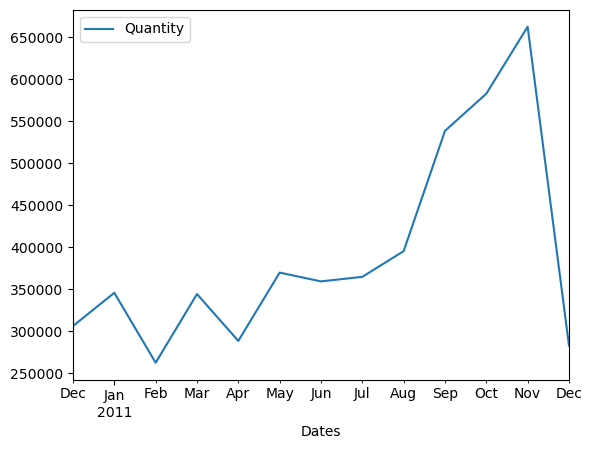

In [63]:
df_time.groupby(by='Dates')['Quantity'].sum().reset_index().resample('M', on='Dates').sum().plot()

Por não conter todos os dados mensais, a quantidade das vendas realizadas pode não ser exata. 

9. Quais dias da semana tem mais vendas?


In [64]:
df_time.groupby(['WeekDay'])['Quantity'].count().sort_values(ascending=False)

WeekDay
Thursday     67221
Wednesday    56223
Tuesday      55014
Monday       52158
Friday       45975
Sunday       44903
Name: Quantity, dtype: int64

10. Datas comemorativas tem mais vendas?


Como se trata de um e-commerce, não podemos afirmar que as datas comemorativas influenciam nas vendas do varejista online, pois ha o lead time da entrega que pode chegar até 3 meses.

11. Quais horarios ha mais vendas?


In [65]:
#Os horarios com mais transação comercial é as 12h36.
df_time.groupby('Time')['Quantity'].count().sort_values(ascending=False).head()

Time
12:36:00    1498
13:35:00    1413
12:41:00    1283
12:44:00    1279
12:25:00    1269
Name: Quantity, dtype: int64

3. plotar serie temporal para alguns clientes/ ex. Reino Unido top cinco produtos.

In [66]:
df_time.groupby(['Country'])['CustomerID'].value_counts().sort_values(ascending=False).head()

Country         CustomerID
EIRE            14911.0       5509
United Kingdom  17841.0       3453
                14096.0       2732
                12748.0       2228
Netherlands     14646.0       1936
Name: CustomerID, dtype: int64

In [67]:
top_UK_user = df_time[(df_time['Country']=='United Kingdom') & (df_time['CustomerID']==17841.0)]
top_UK_user.head()

,Dates,Time,CustomerID,InvoiceNo,StockCode,Description,Country,Quantity,UnitPrice,Total,Month,Day,WeekDay
1087,2010-12-01,14:41:00,17841.0,536557,20616,CHERRY BLOSSOM PASSPORT COVER,United Kingdom,2,2.10,4.20,12,1,Wednesday
1088,2010-12-01,14:41:00,17841.0,536557,20668,DISCO BALL CHRISTMAS DECORATION,United Kingdom,24,0.12,2.88,12,1,Wednesday
1089,2010-12-01,14:41:00,17841.0,536557,20972,PINK CREAM FELT CRAFT TRINKET BOX,United Kingdom,2,1.25,2.50,12,1,Wednesday
1090,2010-12-01,14:41:00,17841.0,536557,21098,CHRISTMAS TOILET ROLL,United Kingdom,2,1.25,2.50,12,1,Wednesday
1091,2010-12-01,14:41:00,17841.0,536557,21259,VICTORIAN SEWING BOX SMALL,United Kingdom,4,5.95,23.80,12,1,Wednesday


<AxesSubplot:xlabel='Dates'>

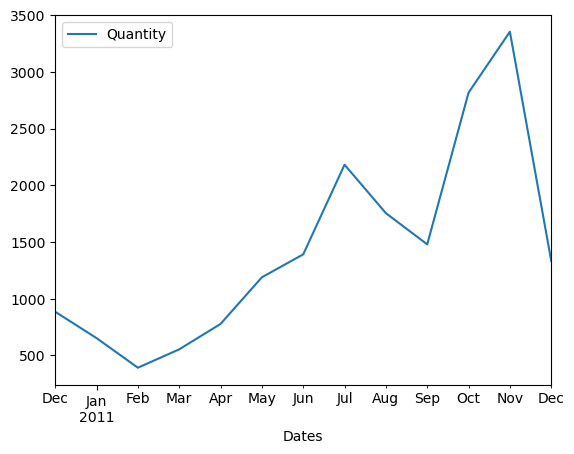

In [68]:
top_UK_user.groupby('Dates')['Quantity'].sum().reset_index().resample(rule='M', on='Dates').sum().plot()

In [69]:
top_5 = top_UK_user.groupby('StockCode')['Dates'].count().sort_values(ascending=False)[:5].index
top_5

Index(['79321', '21927', '20668', '22355', '22467'], dtype='object', name='StockCode')

	Time Series Analysis for customer 17841.0:



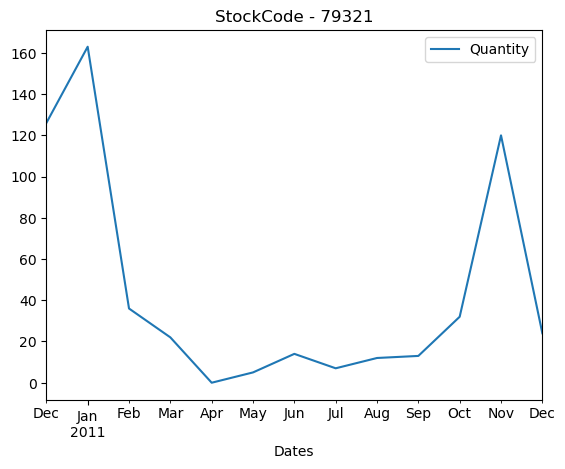

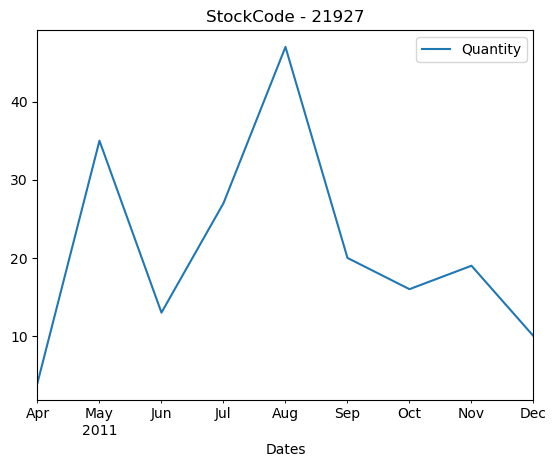

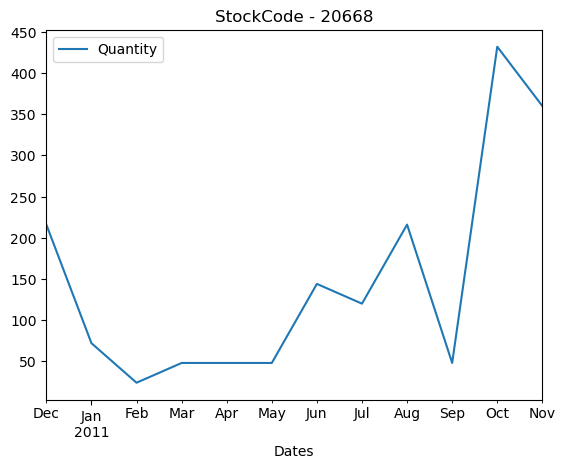

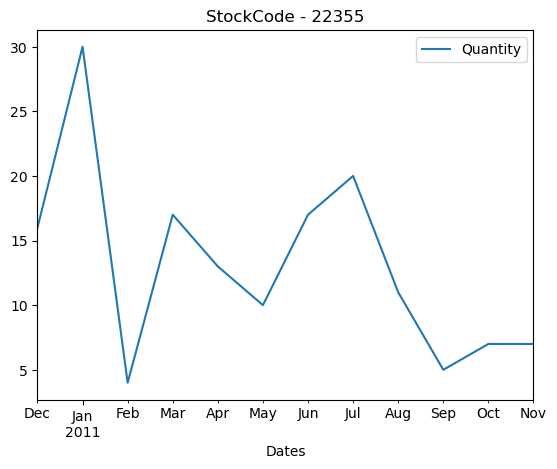

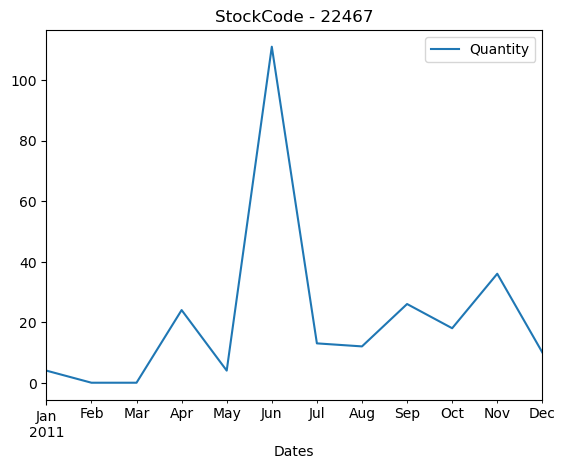

In [70]:
print('\tTime Series Analysis for customer 17841.0:\n')
for product in top_5:
    df_uk = top_UK_user[top_UK_user['StockCode']==product]
    top_5 = df_uk.groupby(['Dates'])['Quantity'].sum().reset_index().resample(rule='M', on='Dates').sum().reset_index()
    top_5.set_index('Dates', inplace=True)
    top_5.plot(title= f'StockCode - {product}')
    

# Market Basket Analysis

**Market Basket Analysis (MBA**) is a technique used to identify the relationships between different products purchased by customers. In this approach, we **analyze the customer's purchase history and look for patterns in their buying behavior to suggest products that are frequently purchased together**. 

Before we begin, we need to make sure that we have the necessary libraries installed. We'll be using the pandas, numpy, and mlxtend libraries for this tutorial.

In [71]:
# pip install pandas numpy mlxtend

In [72]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [73]:
df_grouped['selled'] = 1
pivot = df_grouped.pivot_table(values='selled',index='InvoiceNo',columns='Description').fillna(0)

In [74]:
pivot

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
freq_items = apriori(pivot,min_support=0.02,use_colnames=True).sort_values(by='support',ascending=False)
freq_items

/opt/conda/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,support,itemsets
148,0.101831,(WHITE HANGING HEART T-LIGHT HOLDER)
62,0.081662,(JUMBO BAG RED RETROSPOT)
9,0.074592,(ASSORTED COLOUR BIRD ORNAMENT)
98,0.069275,(PARTY BUNTING)
117,0.067412,(REGENCY CAKESTAND 3 TIER)
...,...,...
23,0.020224,(DOORMAT HEARTS)
105,0.020169,(PLASTERS IN TIN STRONGMAN)
106,0.020114,(PLASTERS IN TIN VINTAGE PAISLEY )
17,0.020059,(CHRISTMAS CRAFT LITTLE FRIENDS)


In [76]:
rules = association_rules(freq_items,metric='lift',min_threshold=1).sort_values(by='lift',ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.027458,0.034144,0.022525,0.820359,24.026124,0.021588,5.376596,0.985437
11,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.034144,0.027458,0.022525,0.659711,24.026124,0.021588,2.857989,0.992259
28,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.028390,0.034473,0.020936,0.737452,21.391962,0.019957,3.677521,0.981107
29,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.034473,0.028390,0.020936,0.607313,21.391962,0.019957,2.474262,0.987289
3,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.039680,0.034144,0.026800,0.675414,19.781076,0.025446,2.975657,0.988677
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.034144,0.039680,0.026800,0.784912,19.781076,0.025446,4.464772,0.983011
18,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.027458,0.039680,0.021539,0.784431,19.768965,0.020449,4.454818,0.976221
19,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.039680,0.027458,0.021539,0.542818,19.768965,0.020449,2.127252,0.988645
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.040338,0.036172,0.024663,0.611413,16.902792,0.023204,2.480340,0.980385
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.036172,0.040338,0.024663,0.681818,16.902792,0.023204,3.016082,0.976148
